# **Chennai House Price Prediction**

**Problem Statement**

Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?

# **Data**
The historical sale data is available here. (https://drive.google.com/file/d/1hqlG0IqJh87-GiMNL_KAtbtZppMO07Hb/view?usp=sharing)


**Minimum Requirements**

It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GUVI Projects/Karthik/House Price Prediction/train-chennai-sale.csv")

In [ ]:
# Backing-up our source data

data_ref = data.copy(deep = True)
data_ref

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [ ]:
data.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [ ]:
data.shape[0]

7109

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

# **Data Preprocessing**

**DATA CLEANING & FEATURE ENGINEERING**


Data needs to be cleaned as per the following requirements:



1.   Imputing Missing Values in ***N_BEDROOM,***	***N_BATHROOM*** and ***QS_OVERALL*** columns.

2. Mispelled words needs to be corrected in Categorical columns such as **'SALE_COND', 'PARK_FACIL','BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE'**.

3.   Data types needs to be changed in **'DATE_SALE', 'N_BEDROOM',
       'N_BATHROOM', 'DATE_BUILD'.**

4. calculation of "Age of the Building"

*Before all of this, "column names" should be changed to Lower case.*

In [ ]:
# check number of unique ids in the dataset
data.shape[0] - len(data['PRT_ID'].unique())

0

In [ ]:
# Checking for Null values
data.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

converting **"column names" to lower case.**

In [ ]:
names = data.columns.to_list()

for i in range(len(names)):
  names[i] = names[i].lower()

names

['prt_id',
 'area',
 'int_sqft',
 'date_sale',
 'dist_mainroad',
 'n_bedroom',
 'n_bathroom',
 'n_room',
 'sale_cond',
 'park_facil',
 'date_build',
 'buildtype',
 'utility_avail',
 'street',
 'mzzone',
 'qs_rooms',
 'qs_bathroom',
 'qs_bedroom',
 'qs_overall',
 'reg_fee',
 'commis',
 'sales_price']

In [ ]:
data.columns = names
data

,prt_id,area,int_sqft,date_sale,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,...,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,reg_fee,commis,sales_price
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


# **1. Imputing Missing Values**

1. Imputing "mode" in bedroom & bathroom columns
2. Imputing "mean" in qs_Overall columns

In [ ]:
# Imputing "mode" in bedroom & bathroom columns

data['n_bedroom'] = data['n_bedroom'].fillna(data['n_bedroom'].mode()[0])
data['n_bathroom'] = data['n_bathroom'].fillna(data['n_bathroom'].mode()[0])

In [ ]:
# Imputing "mean" in qs_Overall columns

data['qs_overall'] = data['qs_overall'].fillna(data['qs_overall'].mean())

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   prt_id         7109 non-null   object 
 1   area           7109 non-null   object 
 2   int_sqft       7109 non-null   int64  
 3   date_sale      7109 non-null   object 
 4   dist_mainroad  7109 non-null   int64  
 5   n_bedroom      7109 non-null   float64
 6   n_bathroom     7109 non-null   float64
 7   n_room         7109 non-null   int64  
 8   sale_cond      7109 non-null   object 
 9   park_facil     7109 non-null   object 
 10  date_build     7109 non-null   object 
 11  buildtype      7109 non-null   object 
 12  utility_avail  7109 non-null   object 
 13  street         7109 non-null   object 
 14  mzzone         7109 non-null   object 
 15  qs_rooms       7109 non-null   float64
 16  qs_bathroom    7109 non-null   float64
 17  qs_bedroom     7109 non-null   float64
 18  qs_overa

# **2. Correction of Mispelled categories:**

Mispelled words needs to be corrected in Categorical columns such as **'SALE_COND', 'PARK_FACIL','BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE'**.

Mispelled correction on **"Area"**

There are lot of duplicate mispelled categories available.

In [ ]:
data['area'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [ ]:
Area_Dict = {"Karapakam":"Karapakkam", "Ann Nagar": "Anna Nagar", "Ana Nagar": "Anna Nagar", 'Chrmpet' : 'Chrompet',
             "Adyr": "Adyar", "Velchery": "Velachery", "Chormpet": "Chrompet","Chrompt": "Chrompet", "KKNagar" : "KK Nagar", "TNagar": "T Nagar" }

In [ ]:
# data.area = data.area.map(Area_Dict) --> We should not use map function here, 

# we have to use "replace", because "map" function replaces the entries which are not given to "NAN" values

data.area = data.area.replace(Area_Dict)

In [ ]:
data['area'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

Mispelled correction on **"sale_cond"**

There are lot of duplicate mispelled categories available.

In [ ]:
data['sale_cond'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [ ]:
Sale_cond = {'Ab Normal':'AbNormal', 'Partiall':'Partial', 'PartiaLl' : 'Partial', 'Adj Land': 'AdjLand'}
data = data.replace({'sale_cond': Sale_cond})


In [ ]:
data['sale_cond'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

Mispelled correction on **"park_facil"**

There are lot of duplicate mispelled categories available.

In [ ]:
data['park_facil'].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [ ]:
data['park_facil'] = data['park_facil'].replace({'Noo': 'No'})

In [ ]:
data['park_facil'].unique()

array(['Yes', 'No'], dtype=object)

Mispelled correction on **"buildtype"**

There are lot of duplicate mispelled categories available.

In [ ]:
data['buildtype'].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [ ]:
BUILDTYPE = {'Comercial': 'Commercial', 'Other': 'Others'}
data['buildtype'] = data['buildtype'].replace(BUILDTYPE)

In [ ]:
data['buildtype'].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

Mispelled correction on **"utility_avail"**

There are lot of duplicate mispelled categories available.

In [ ]:
data['utility_avail'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [ ]:
UTILITY_AVAIL = {'AllPub': 'All Pub', 'NoSewr ':'NoSeWa'}
data['utility_avail'] = data['utility_avail'].replace(UTILITY_AVAIL)

In [ ]:
data['utility_avail'].unique()

array(['All Pub', 'ELO', 'NoSeWa'], dtype=object)

Mispelled correction on **"street"**

There are lot of duplicate mispelled categories available.

In [ ]:
data['street'].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [ ]:
STREET = {'Pavd': 'Paved', 'NoAccess': 'No Access'}
data['street'] = data['street'].replace(STREET)

In [ ]:
data['street'].unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

Checking Unique values on **"mzzone"**

In [ ]:
data['mzzone'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

# **3. Datatype Conversion**

In [ ]:
data['n_bedroom'] = data.n_bedroom.astype ('int64')
data['n_bathroom'] = data.n_bathroom.astype ('int64')

In [ ]:
data['date_build'] = data['date_build'].astype('datetime64[ns]')
data['date_sale'] = data['date_sale'].astype('datetime64[ns]')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   prt_id         7109 non-null   object        
 1   area           7109 non-null   object        
 2   int_sqft       7109 non-null   int64         
 3   date_sale      7109 non-null   datetime64[ns]
 4   dist_mainroad  7109 non-null   int64         
 5   n_bedroom      7109 non-null   int64         
 6   n_bathroom     7109 non-null   int64         
 7   n_room         7109 non-null   int64         
 8   sale_cond      7109 non-null   object        
 9   park_facil     7109 non-null   object        
 10  date_build     7109 non-null   datetime64[ns]
 11  buildtype      7109 non-null   object        
 12  utility_avail  7109 non-null   object        
 13  street         7109 non-null   object        
 14  mzzone         7109 non-null   object        
 15  qs_rooms       7109 n

# **4. Age Calcuation**

In [ ]:
from datetime import datetime
from dateutil import relativedelta

Age_Data= []

for i in range(len(data)):
  d1 = data['date_build'][i].date()
  d2 = data['date_sale'][i].date()
  delta = relativedelta.relativedelta(d1, d2)
  Age_Data.append(abs(delta.years))

In [ ]:
print(Age_Data)

[43, 10, 19, 21, 29, 4, 27, 9, 34, 14, 27, 36, 19, 25, 53, 9, 17, 36, 30, 41, 3, 21, 9, 15, 4, 33, 29, 7, 38, 34, 8, 9, 19, 19, 5, 21, 26, 12, 25, 39, 35, 17, 47, 46, 15, 29, 20, 11, 27, 9, 33, 48, 4, 9, 29, 30, 36, 45, 4, 27, 21, 30, 38, 36, 41, 21, 23, 24, 4, 23, 44, 4, 54, 29, 29, 20, 8, 28, 9, 32, 39, 28, 27, 6, 42, 27, 5, 12, 37, 36, 25, 7, 16, 27, 19, 17, 33, 16, 13, 31, 53, 4, 20, 39, 28, 40, 28, 33, 13, 36, 10, 16, 34, 6, 3, 7, 10, 25, 13, 24, 36, 7, 23, 38, 28, 34, 17, 3, 4, 19, 15, 8, 24, 41, 36, 12, 31, 15, 36, 20, 23, 49, 22, 9, 30, 27, 29, 41, 45, 20, 26, 25, 25, 3, 52, 20, 9, 28, 16, 11, 18, 32, 6, 8, 16, 33, 38, 39, 16, 37, 32, 23, 20, 35, 34, 17, 23, 12, 35, 16, 47, 7, 40, 3, 21, 29, 17, 28, 9, 33, 12, 33, 27, 10, 54, 16, 31, 24, 14, 14, 34, 18, 5, 21, 9, 30, 38, 15, 12, 24, 38, 26, 20, 33, 19, 37, 33, 50, 28, 26, 30, 23, 6, 28, 42, 14, 11, 25, 22, 31, 7, 31, 31, 17, 19, 5, 35, 20, 10, 7, 6, 15, 23, 18, 21, 16, 31, 39, 21, 30, 30, 24, 19, 47, 4, 6, 15, 24, 35, 35, 49, 1

In [ ]:
data['house_age'] = Age_Data

In [ ]:
# Alternate & Simple way to find the age of the buildings

#data.house_age = data['date_build'].dt.year - data['date_sale'].dt.year

# **Exploratory Data Analysis**

**Seperating the data by data type wise for EDA.**

In [ ]:
# Seperating features with "Object" datatypes only.

categorical_features = data.select_dtypes(include=['object']).copy()
categorical_features.head()

,prt_id,area,sale_cond,park_facil,buildtype,utility_avail,street,mzzone
0,P03210,Karapakkam,AbNormal,Yes,Commercial,All Pub,Paved,A
1,P09411,Anna Nagar,AbNormal,No,Commercial,All Pub,Gravel,RH
2,P01812,Adyar,AbNormal,Yes,Commercial,ELO,Gravel,RL
3,P05346,Velachery,Family,No,Others,NoSeWa,Paved,I
4,P06210,Karapakkam,AbNormal,Yes,Others,All Pub,Gravel,C


In [ ]:
# Continous and DateTime datatypes only available here

continous_features = data.select_dtypes(exclude=['object']).copy()

continous_features.head(10)

,int_sqft,date_sale,dist_mainroad,n_bedroom,n_bathroom,n_room,date_build,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,reg_fee,commis,sales_price,house_age
0,1004,2011-04-05,131,1,1,3,1967-05-15,4.0,3.9,4.9,4.330,380000,144400,7600000,43
1,1986,2006-12-19,26,2,1,5,1995-12-22,4.9,4.2,2.5,3.765,760122,304049,21717770,10
2,909,2012-04-02,70,1,1,3,1992-09-02,4.1,3.8,2.2,3.090,421094,92114,13159200,19
3,1855,2010-03-13,14,3,2,5,1988-03-18,4.7,3.9,3.6,4.010,356321,77042,9630290,21
4,1226,2009-05-10,84,1,1,3,1979-10-13,3.0,2.5,4.1,3.290,237000,74063,7406250,29
5,1220,2014-11-09,36,2,1,4,2009-12-09,4.5,2.6,3.1,3.320,409027,198316,12394750,4
6,1167,2007-05-04,137,1,1,3,1979-12-04,3.6,2.1,2.5,2.670,263152,33955,8488790,27
7,1847,2006-03-13,176,3,2,5,1996-03-15,2.4,4.5,2.1,3.260,604809,235204,16800250,9
8,771,2011-06-04,175,1,1,2,1977-04-14,2.9,3.7,4.0,3.550,257578,33236,8308970,34
9,1635,2006-06-22,74,2,1,4,1991-06-26,3.1,3.1,3.3,3.160,323346,121255,8083650,14


In [ ]:
# To know the distribution of categroical features, we're just excluding the "prt_id", since it is unique and cannot find the distribution properly.

data_cat = categorical_features.columns
data_cat = data_cat[1:]
data_cat

Index(['area', 'sale_cond', 'park_facil', 'buildtype', 'utility_avail',
       'street', 'mzzone'],
      dtype='object')

**Distribution of Categorical Features**

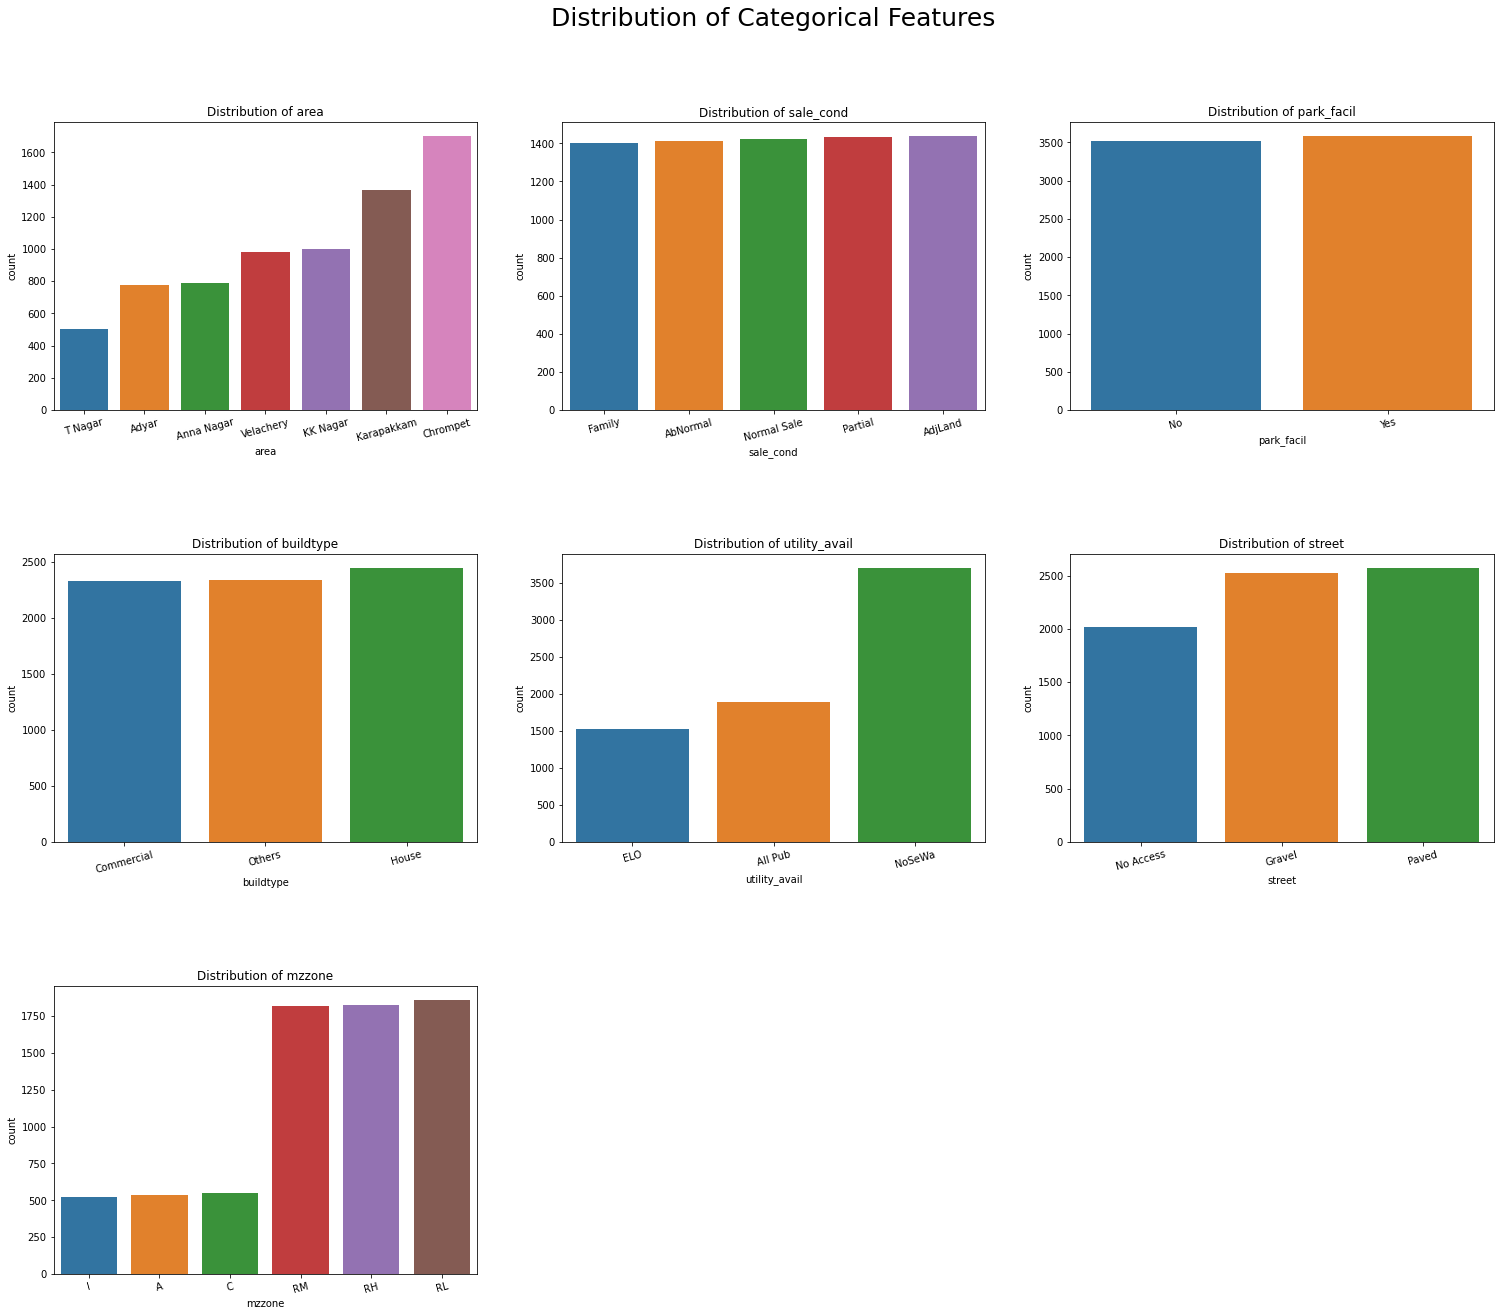

In [ ]:
j = 0
plt.figure(figsize = (25, 20))
plt.suptitle('Distribution of Categorical Features', fontsize=25)

for i in data_cat:
  plt.subplot(3,3,j+1)
  sns.countplot(x=i, data=categorical_features,
                order = categorical_features[i].value_counts(ascending = True).index)
  plt.xlabel(i)
  plt.title(f'Distribution of {i}')
  plt.xticks(rotation=15)
  j += 1
  
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.5)

**Distribution of Categorical Features:**

**AREA:**

People preferred to buy in Chrompet the most, followed by Karapakkam. But peoples showing less interest in T Nagar.

**Sale Condition:**

The number of sales happened with respect to the Sale condition is almost same.
People don't show variations in buying based on type of sales, where Adjacent Land sold a lot, Family properties transferred less.

The sale conditon has evenly distributed and there is no better pattern to infer.

**Parking Facility:**

Parking Facility does not affected the sales much. 
Here we could see the even distribution and there is no beeter pattern to infer.

Here too, there is not much difference though people opted for the houses with Parking Facility.
From this, we could infer that half of the population don't own vehicles or the parking facility doesn't mean a lot to them.

**Build Type:**

People are more interested in Houses than Commercial buildings and others.

**Utility Available:**

Most people opted "No Sewr" followed by "All Pub" and "ELO" 

**Street**

There is a demand for accessibility to their houses / others.
Most people opted for paved road and if not available, they preferred atleast Gravel.

But decent number of people are opting, even the street has "No access".

**MZZONE:**

Most people showed their interest in Residential areas, irrespective of Low (RL) or Medium (RM) or High density (RH). Since there is no much diffrence between them.

But people showed less interest in Commercial (C), Agricultural (A) zones and most least in Industrial (I) zones.

**Bi-Variate Analysis** - Categorical Features vs Target (Sales_Price)

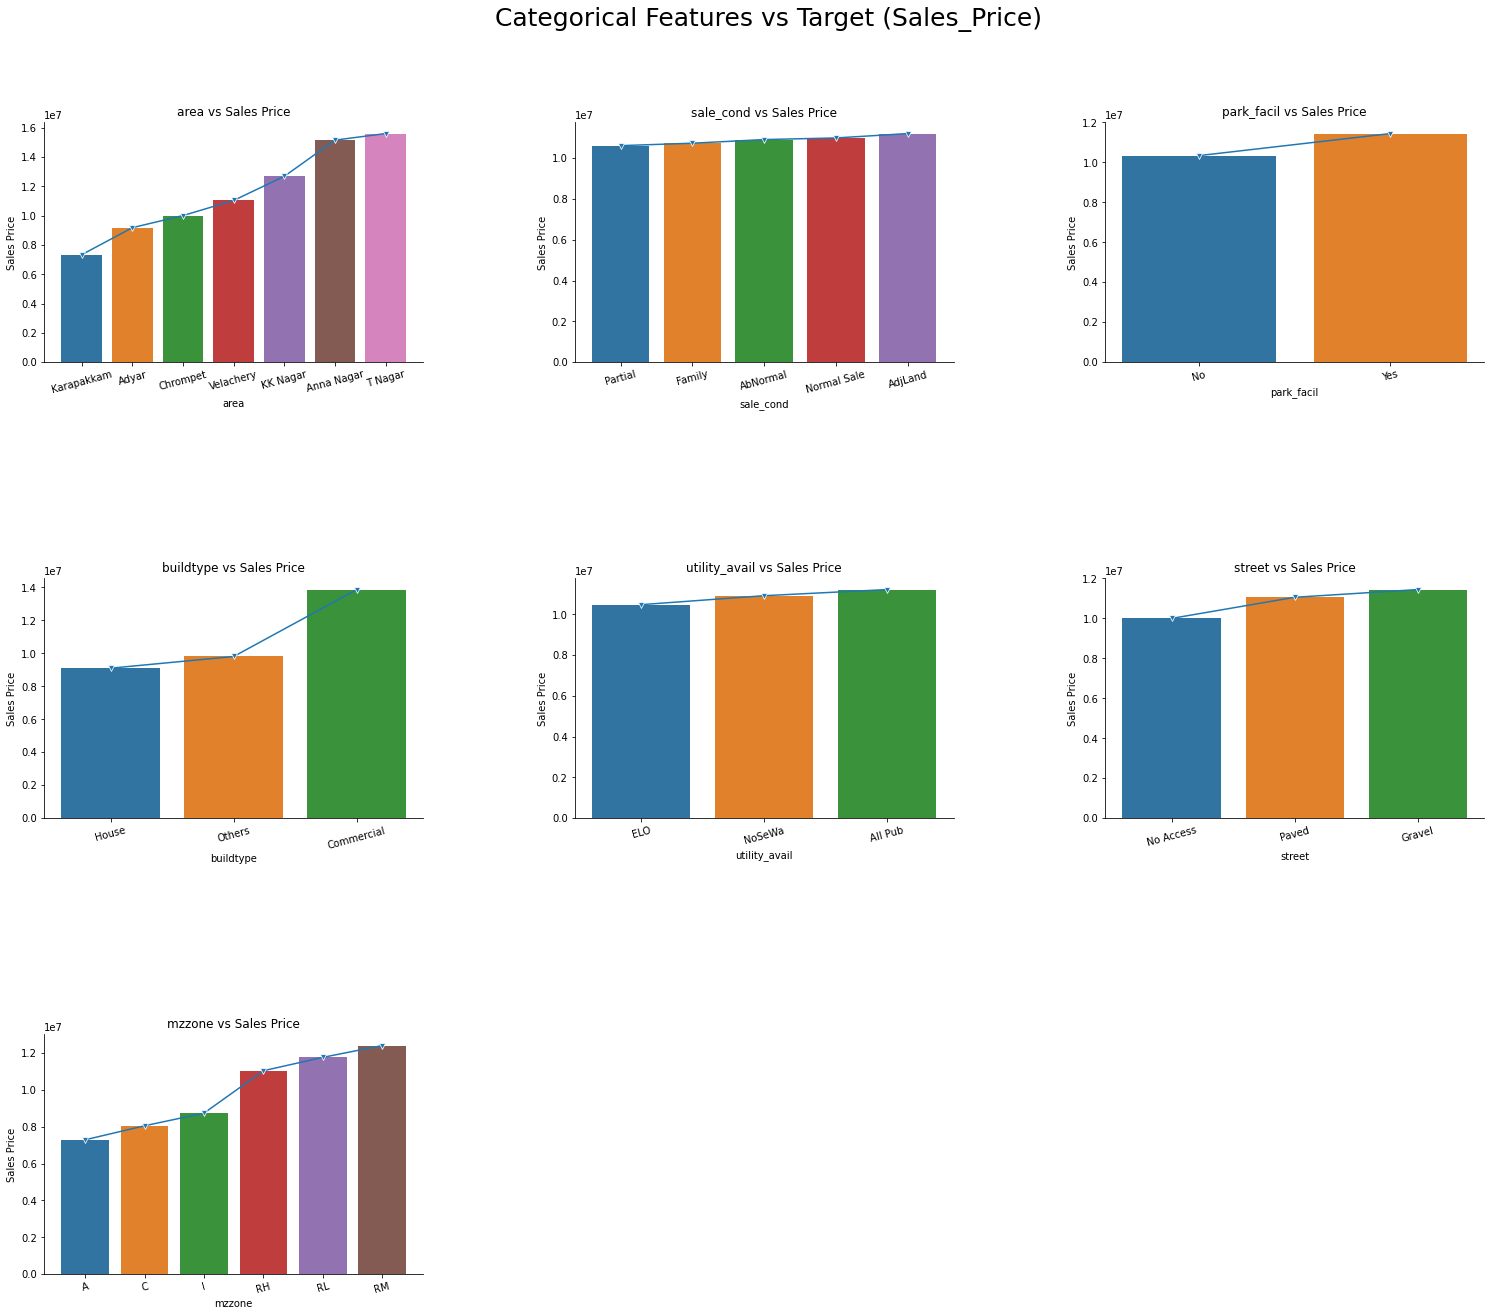

In [ ]:
j = 0
plt.figure(figsize = (25,20))
plt.suptitle(' Categorical Features vs Target (Sales_Price)', fontsize=25)


for i in data_cat:
  plt.subplot(3,3,j+1)
  result = data.groupby(i)['sales_price'].mean().sort_values()
  x = result.index
  y = result.values
  sns.barplot(x, y, order = x)
  sns.lineplot(x,y, marker = 'v')
  plt.xlabel(i)
  plt.ylabel('Sales Price')
  plt.title(f'{i} vs Sales Price')
  plt.xticks(rotation=15)
  sns.despine()
  j += 1

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.9)
plt.show()

**Categorical Features versus Sales Price (Target Variable):**

**AREA:**

We could clearly infer the pattern with respect to the Sales Price. The revenue generated in T Nagar and Anna Nagar is very high, even the number of houses sold is low.

The same case of its vice versa happened for Karapakkam and chrompet. Though the number of sales so good but the revenue generation is too low. It means that, houses sold in  T Nagar & Anna Nagar are at high price.
Houses sold in Karapakkam and chrompet are with less margins.

Since it is Multi-class nominal category,  we're going to do **"One hot encoding."**


**Sale Condition:**

Revenue generated with respect to the Sale condition is almost same with all the categories. People don't show variations in buying based on type of sales, where Adjacent Land generated a lot, Family properties generated less revenue.

The sale conditon has evenly distributed and there is no better pattern to infer.

Since it is Multi-class nominal category,  we're going to do **"One hot encoding."**


**Parking Facility:**

Parking Facility does not affected the sales much. Here we could see the even distribution and there is no beeter pattern to infer.

Since it is Binary-classification,  we're going to do **"Label encoding."**


**Build Type:**

Even though people are more interested in Houses than Commercial buildings and others, Commercial buildings have a generated great sales than the rest.

Since it is Multi-class nominal category,  we're going to do **"One hot encoding."**


**Utility Available:**

Revenue generated almost equal on all the utility avaialble.

Since it is Multi-class nominal category,  we're going to do **"One hot encoding."**

**Street**

Revenue generated with respect to the street is appropirate proportions only.

Since it is Multi-class nominal category,  we're going to do **"One hot encoding."**


**MZZONE:**

Revenue generated from Agri, Industrial and commercials are relatively equals to the Residentials

Since it is Multi-class nominal category,  we're going to do **"One hot encoding."**


**Distribution of Continous Features**

In [ ]:
# Deleting the dependent or Target Variable

del continous_features['sales_price']
continous_features.head()

,int_sqft,date_sale,dist_mainroad,n_bedroom,n_bathroom,n_room,date_build,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,reg_fee,commis,house_age
0,1004,2011-04-05,131,1,1,3,1967-05-15,4.0,3.9,4.9,4.330,380000,144400,43
1,1986,2006-12-19,26,2,1,5,1995-12-22,4.9,4.2,2.5,3.765,760122,304049,10
2,909,2012-04-02,70,1,1,3,1992-09-02,4.1,3.8,2.2,3.090,421094,92114,19
3,1855,2010-03-13,14,3,2,5,1988-03-18,4.7,3.9,3.6,4.010,356321,77042,21
4,1226,2009-05-10,84,1,1,3,1979-10-13,3.0,2.5,4.1,3.290,237000,74063,29


Text(0.5, 0.98, 'Distribution of Continous Features')

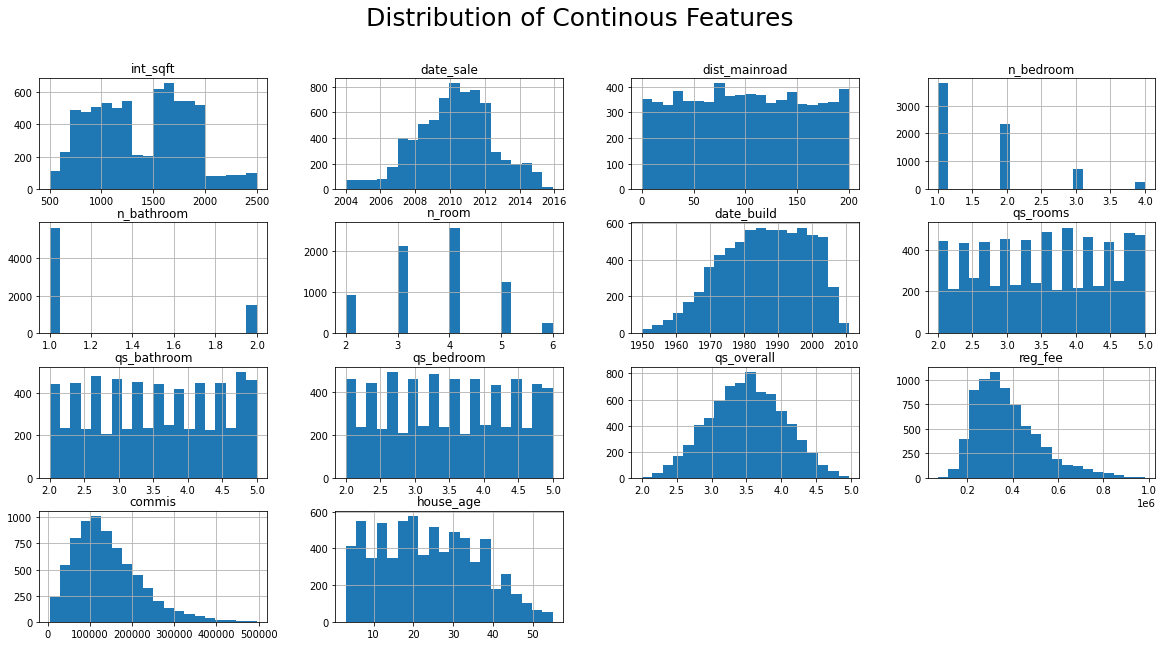

In [ ]:
# Distribution of Continous Features

continous_features.hist(bins=20, figsize=(20, 10))

plt.suptitle('Distribution of Continous Features', fontsize=25)

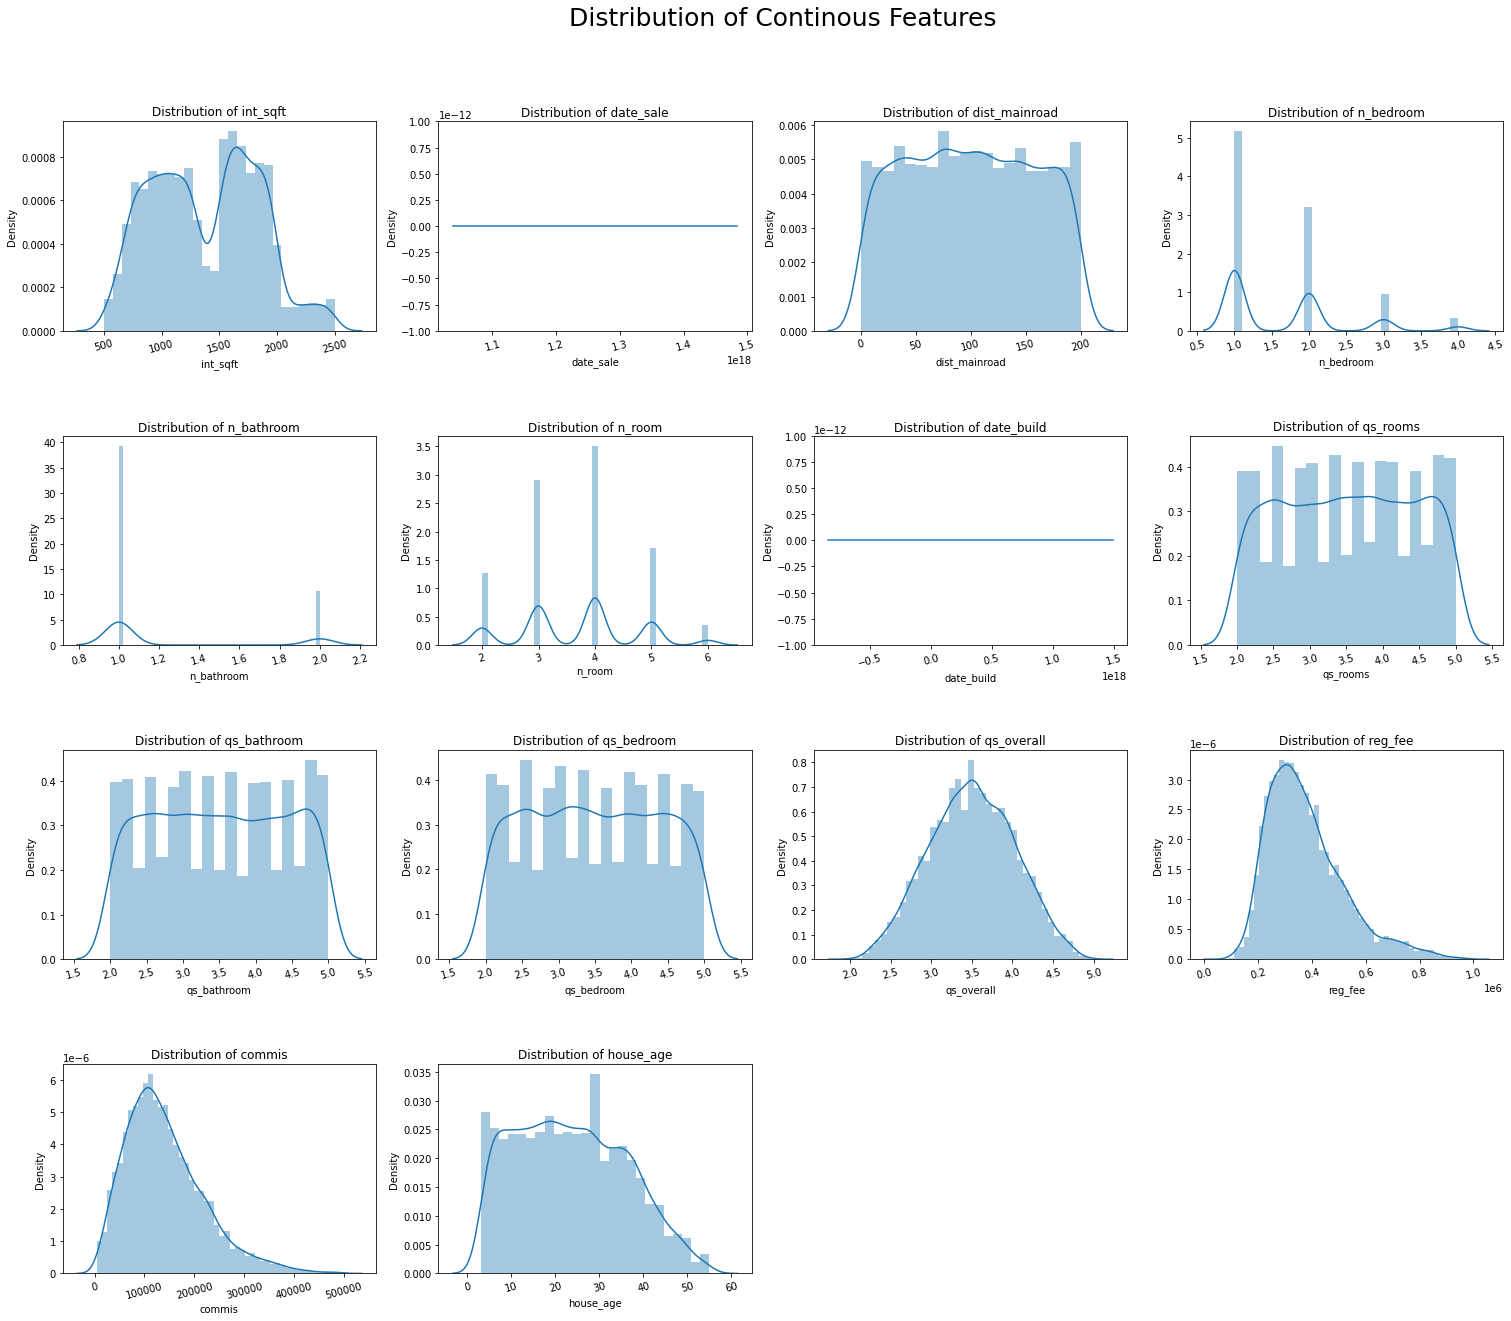

In [ ]:
# Distribution of Continous Features


j = 0
plt.figure(figsize = (25, 20))
plt.suptitle('Distribution of Continous Features', fontsize=25)


for i in continous_features:
  
  plt.subplot(4,4,j+1)
  sns.distplot(x= continous_features[i])
  plt.xlabel(i)
  plt.title(f'Distribution of {i}')
  plt.xticks(rotation=15)
  j += 1
  
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.5)

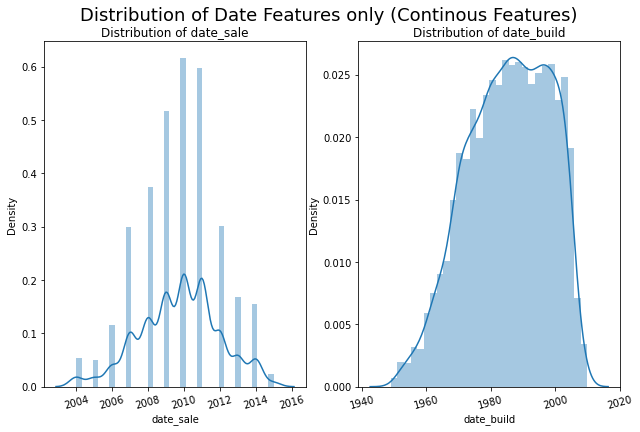

In [ ]:
# Distribution of Date Features only

j = 0

plt.figure(figsize = (10, 6))
plt.suptitle('Distribution of Date Features only (Continous Features) ', fontsize=18)

Date = ['date_sale', 'date_build']

for i in Date:

  plt.subplot(1,2,j+1)
  sns.distplot(continous_features[i].dt.year)
  plt.xlabel(i)
  plt.title(f'Distribution of {i}')
  plt.xticks(rotation=15)
  j += 1


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.5)


**Numerical Features Vs Sales Price (Target Vairable)**

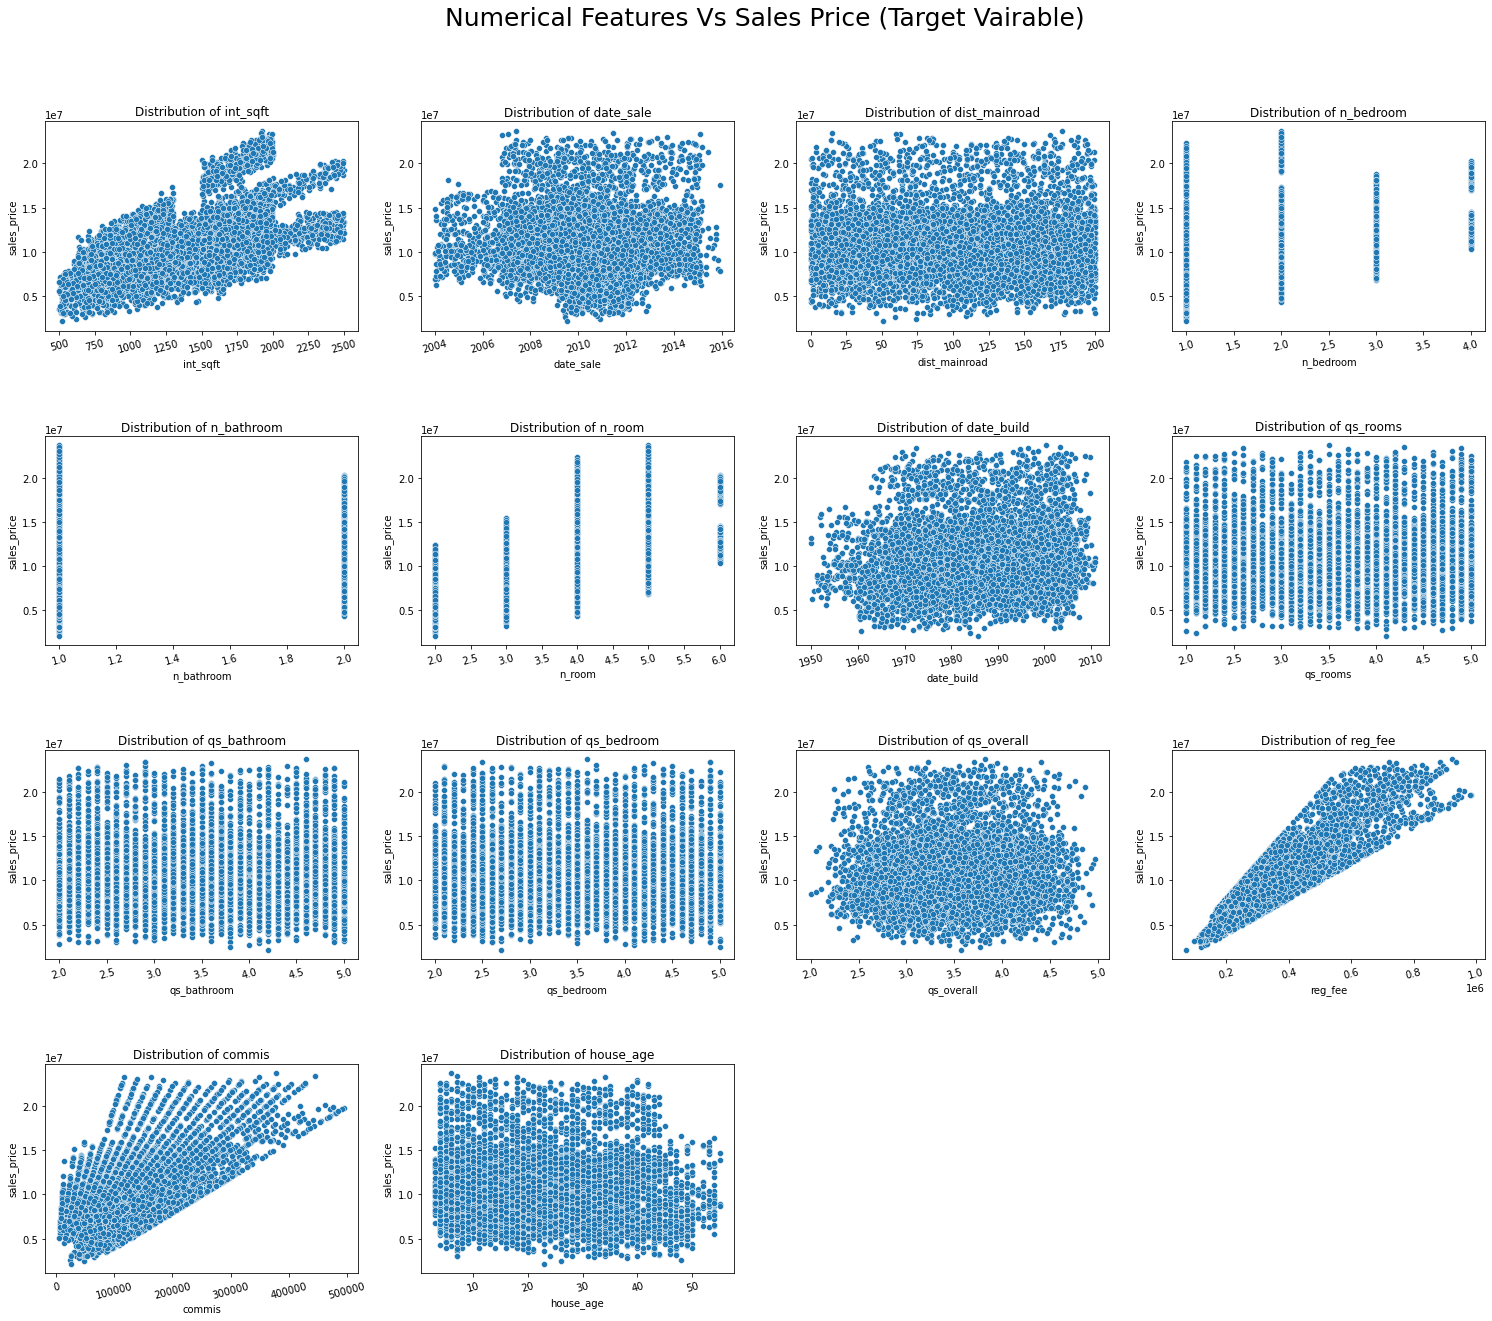

In [ ]:
# Numerical Features Vs Sales Price (Target Vairable)

j = 0
plt.figure(figsize = (25, 20))
plt.suptitle('Numerical Features Vs Sales Price (Target Vairable)', fontsize=25)


for i in continous_features:
  
  plt.subplot(4,4,j+1)
  sns.scatterplot(x= continous_features[i], y= data['sales_price'],data = continous_features)
  plt.xlabel(i)
  plt.title(f'Distribution of {i}')
  plt.xticks(rotation=15)
  j += 1
  
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.5)

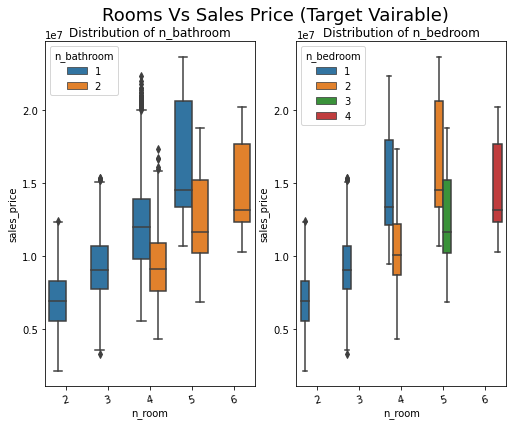

In [ ]:
j = 0

plt.figure(figsize = (8, 6))
plt.suptitle('Rooms Vs Sales Price (Target Vairable)', fontsize=18)

hue = ['n_bathroom', 'n_bedroom']

for i in hue:

  plt.subplot(1,2,j+1)
  sns.boxplot(x =data['n_room'] , y = data['sales_price'] , data = data, hue = i)
  plt.xlabel("n_room")
  plt.title(f'Distribution of {i}')
  plt.xticks(rotation=15)
  j += 1


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.5)

# **Features Selection**

By analysing all the features from distribution chart with the "Sales Price" (Target variable), we're going to delete the following features, which may not useful for our model.

In [ ]:
data.columns

Index(['prt_id', 'area', 'int_sqft', 'date_sale', 'dist_mainroad', 'n_bedroom',
       'n_bathroom', 'n_room', 'sale_cond', 'park_facil', 'date_build',
       'buildtype', 'utility_avail', 'street', 'mzzone', 'qs_rooms',
       'qs_bathroom', 'qs_bedroom', 'qs_overall', 'reg_fee', 'commis',
       'sales_price', 'house_age'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   prt_id         7109 non-null   object        
 1   area           7109 non-null   object        
 2   int_sqft       7109 non-null   int64         
 3   date_sale      7109 non-null   datetime64[ns]
 4   dist_mainroad  7109 non-null   int64         
 5   n_bedroom      7109 non-null   int64         
 6   n_bathroom     7109 non-null   int64         
 7   n_room         7109 non-null   int64         
 8   sale_cond      7109 non-null   object        
 9   park_facil     7109 non-null   object        
 10  date_build     7109 non-null   datetime64[ns]
 11  buildtype      7109 non-null   object        
 12  utility_avail  7109 non-null   object        
 13  street         7109 non-null   object        
 14  mzzone         7109 non-null   object        
 15  qs_rooms       7109 n

In [ ]:
Deleteables = ['prt_id', 'date_sale','date_build', 'reg_fee', 'commis','dist_mainroad', 'qs_rooms', 'qs_bathroom', 'qs_bedroom', 'qs_overall', 'house_age','n_room']

data.drop(Deleteables, axis = 1, inplace = True)

In [ ]:
data['park_facil'] = data['park_facil'].map({'Yes' : 1, 'No' : 0})

#**Encoding the Features**

In [ ]:
Encoded_data = pd.get_dummies(data)

In [ ]:
Encoded_data

,int_sqft,n_bedroom,n_bathroom,park_facil,sales_price,area_Adyar,area_Anna Nagar,area_Chrompet,area_KK Nagar,area_Karapakkam,...,utility_avail_NoSeWa,street_Gravel,street_No Access,street_Paved,mzzone_A,mzzone_C,mzzone_I,mzzone_RH,mzzone_RL,mzzone_RM
0,1004,1,1,1,7600000,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
1,1986,2,1,0,21717770,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,909,1,1,1,13159200,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,1855,3,2,0,9630290,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
4,1226,1,1,1,7406250,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,598,1,1,0,5353000,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
7105,1897,3,2,1,10818480,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
7106,1614,2,1,0,8351410,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
7107,787,1,1,1,8507000,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


#**Outliers deduction in Target Variable**

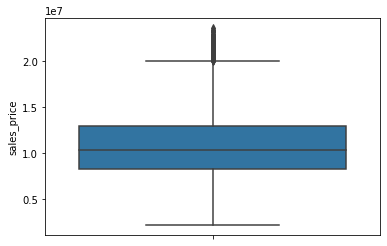

In [ ]:
# Outliers deduction

sns.boxplot(y = data['sales_price'])

In [ ]:
# Outlier Imputation by Absolute Maximum

Actual_maximum = data.sales_price.max()
Actual_minimum = data.sales_price.min()

Q3 = data.sales_price.quantile(0.75)
Q1 = data.sales_price.quantile(0.25)

IQR = Q3 - Q1
Absolute_Maximum = Q3 + (1.5*IQR)


print("Actual_maximum is:", Actual_maximum)
print()
print("Actual_minimum is:", Actual_minimum)
print()
print('Inter Quartile Range (IQR):', IQR)
print()
print('Absolute Maximum:', Absolute_Maximum)



Actual_maximum is: 23667340

Actual_minimum is: 2156875

Inter Quartile Range (IQR): 4721800.0

Absolute Maximum: 20076600.0


In [ ]:
for i in range (len(data['sales_price'])):

  if data['sales_price'][i] > Absolute_Maximum:

    data['sales_price'][i] = Absolute_Maximum

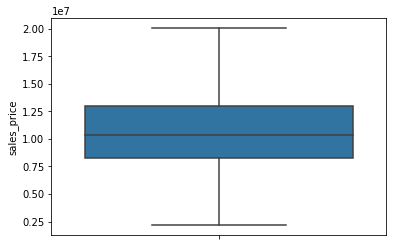

In [ ]:
# Outliers got imputed by Absolute_Maximum

sns.boxplot(y = data['sales_price'])

# **Scaling the Data**

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

In [ ]:
x = Encoded_data.drop(['sales_price'], axis = 1)

y = Encoded_data[['sales_price']]

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, scaled_data, test_size = .3, random_state = 2)

# **Model Selection**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV # only for Hyper Parameter
from sklearn.model_selection import KFold
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.metrics import r2_score


**Linear Regression**

In [ ]:
lr = LinearRegression()

lr.fit(x_train, y_train)


LinearRegression()

In [ ]:
# Train Score

train_score = lr.score(x_train, y_train)
train_score

0.9544206365583027

In [ ]:
y_pred = lr.predict(x_test)

test_score = r2_score(y_pred, y_test)

In [ ]:
score = {'Model' : 'Linear Regression', 'train_score' : train_score, 'test_score' : test_score}

Score_data = pd.Series(score)

In [ ]:
Score_data = pd.DataFrame(Score_data)
Score_data

,0
Model,Linear Regression
train_score,0.954421
test_score,0.950821


**KNeighbors Regressor**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

K = []

for i in [1,2,3,4,5,6,7,8,9,10]: # looping to find best K
    knn = KNeighborsRegressor(i) #initialising the model
    knn.fit(x_train,y_train) # training the model
    # print("K value  : " , i, " score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=j)).round(4) , f'cv : {j}') #predicting using the model

    K.append({'K Value' : i, 'Cross_val_Score': np.mean(cross_val_score(knn, x_train, y_train, cv = 10)).round(5)})
    score = pd.DataFrame(K, columns = ['K Value', 'Cross_val_Score'])


score = score.sort_values(by = 'Cross_val_Score', ascending = False).head()
score

,K Value,Cross_val_Score
3,4,0.57280
2,3,0.56934
4,5,0.56591
5,6,0.55407
6,7,0.54222


In [ ]:
#initialising the model

knn = KNeighborsRegressor(4) 

knn.fit(x_train,y_train)


train_score = knn.score(x_train, y_train)

y_pred = knn.predict(x_test)

test_score = r2_score(y_pred, y_test)

In [ ]:
Score_data[1] = ''
Score_data[1]['Model'] = "KNN"

Score_data[1]['train_score'] = train_score
Score_data[1]['test_score'] = test_score

In [ ]:
Score_data

,0,1
Model,Linear Regression,KNN
train_score,0.954421,0.766167
test_score,0.950821,0.315337


**Decision Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

DT = []

for depth in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,30,40,50]:
  dt = DecisionTreeRegressor(max_depth=depth)

  # dt.fit(x_train, y_train) - have to use fresh model for cross validation

  valAccuracy = cross_val_score(dt, x_train, y_train, cv=10)
  DT.append({'Depth' : depth, 'Cross_val_Score': np.mean(valAccuracy).round(5)})
  score = pd.DataFrame(DT, columns = ['Depth', 'Cross_val_Score'])

score = score.sort_values(by = 'Cross_val_Score', ascending = False).head()
score

,Depth,Cross_val_Score
12,13,0.96655
18,50,0.96649
10,11,0.96649
14,15,0.96635
11,12,0.96623


In [ ]:
# Decision Tree Model
dt = DecisionTreeRegressor(max_depth = 13)
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)
train_score = dt.score(x_train,y_train)
test_score = r2_score(y_test, y_pred)

In [ ]:
Score_data[2] = ''
Score_data[2]['Model'] = "Decision Tree Regressor"

Score_data[2]['train_score'] = train_score
Score_data[2]['test_score'] = test_score

In [ ]:
Score_data

,0,1,2
Model,Linear Regression,KNN,Decision Tree Regressor
train_score,0.954421,0.766167,0.998073
test_score,0.950821,0.315337,0.967643


From the comparison between the models Linear Regression, K-Nearest Neighnbours and Decision Tree Regressor:

**Linear Regression** performed better on both training and test datasets.